In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

import statistics
from collections import Counter

import numpy as np
import pandas as pd
import csv
from functools import reduce

# Import data

In [2]:
p1 = read_csv('ics_data/06_Smart_Meter_45/P1.csv', squeeze=True, index_col=0)
p2 = read_csv('ics_data/06_Smart_Meter_45/P2.csv', squeeze=True, index_col=0)
p3 = read_csv('ics_data/06_Smart_Meter_45/P3.csv', squeeze=True, index_col=0)
q1 = read_csv('ics_data/06_Smart_Meter_45/Q1.csv', squeeze=True, index_col=0)
q2 = read_csv('ics_data/06_Smart_Meter_45/Q2.csv', squeeze=True, index_col=0)
q3 = read_csv('ics_data/06_Smart_Meter_45/Q3.csv', squeeze=True, index_col=0)
u1 = read_csv('ics_data/06_Smart_Meter_45/U1.csv', squeeze=True, index_col=0)
u2 = read_csv('ics_data/06_Smart_Meter_45/U2.csv', squeeze=True, index_col=0)
u3 = read_csv('ics_data/06_Smart_Meter_45/U3.csv', squeeze=True, index_col=0)

/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Fix data

ts
1560434431397     24.260
1560434431422     24.260
1560434433422     24.170
1560434435427     24.200
1560434437427     24.240
1560434439432     24.220
1560434679616    587.595
1560434681616    589.315
1560434683621    590.605
1560434685621    590.390
1560434686426    589.100
1560434689621    555.560
1560434691626    467.840
1560434693626    471.065
1560434695626    469.560
Name: Q3, dtype: float64

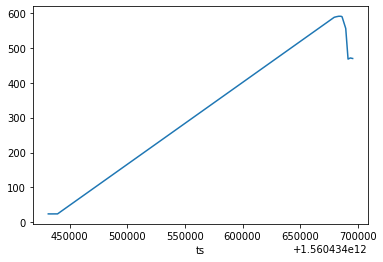

In [3]:
q3[688375:688390].plot()
q3[688375:688390]

1560434439432 - at least before this it has to be multiplied by 18

In [4]:
def mul_values(dataframe, num):
    new_dataframe = dataframe.copy()
    for (data_index, index) in enumerate(dataframe.index):
        last_data_index = 0
        if index > num:
            last_data_index = data_index - 1
            break
        else:
            new_dataframe.values[data_index] *= 18
    
    return new_dataframe, last_data_index

In [5]:
corner_value = 1560434439432

### P1

In [6]:
p1, last_data_index = mul_values(p1, corner_value)

In [7]:
print(p1[last_data_index - 5 : last_data_index + 5])

ts
1560434431397    888.480
1560434431422    888.480
1560434433422    889.560
1560434435427    891.180
1560434437427    899.460
1560434439432    893.340
1560434679616    993.300
1560434681616    993.945
1560434683621    995.880
1560434685621    995.450
Name: P1, dtype: float64


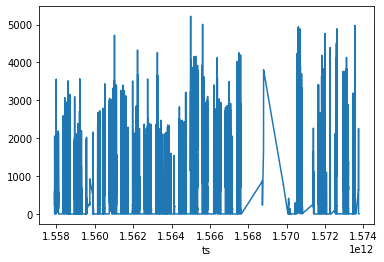

In [8]:
p1.plot()

### P2

In [9]:
p2, last_data_index = mul_values(p2, corner_value)
print(p2[last_data_index - 5 : last_data_index + 5])

ts
1560434431397     9153.720
1560434431422     9153.720
1560434433422     9147.960
1560434435427     9171.360
1560434437427     9181.800
1560434439432     9187.740
1560434679616    11007.140
1560434681616    11019.395
1560434683621    11025.415
1560434685621    11020.255
Name: P2, dtype: float64


### P3

In [10]:
p3, last_data_index = mul_values(p3, corner_value)
print(p3[last_data_index - 5 : last_data_index + 5])

ts
1560434431397    455.580
1560434431422    455.580
1560434433422    453.420
1560434435427    455.940
1560434437427    455.760
1560434439432    455.400
1560434679616    607.590
1560434681616    605.870
1560434683621    605.225
1560434685621    605.870
Name: P3, dtype: float64


### Q1

In [11]:
q1, last_data_index = mul_values(q1, corner_value)
print(q1[last_data_index - 5 : last_data_index + 5])

ts
1560434431397    528.300
1560434431422    528.300
1560434433422    524.520
1560434435427    522.540
1560434437427    520.380
1560434439432    521.100
1560434679616    613.395
1560434681616    611.890
1560434683621    618.125
1560434685621    610.170
Name: Q1, dtype: float64


### Q2

In [12]:
q2, last_data_index = mul_values(q2, corner_value)
print(q2[last_data_index - 5 : last_data_index + 5])

ts
1560434431397    5713.920
1560434431422    5713.920
1560434433422    5705.460
1560434435427    5702.940
1560434437427    5719.860
1560434439432    5715.900
1560434679616    6876.775
1560434681616    6891.825
1560434683621    6906.015
1560434685621    6899.780
Name: Q2, dtype: float64


### Q3

In [13]:
q3, last_data_index = mul_values(q3, corner_value)
print(q3[last_data_index - 5 : last_data_index + 5])

ts
1560434431397    436.680
1560434431422    436.680
1560434433422    435.060
1560434435427    435.600
1560434437427    436.320
1560434439432    435.960
1560434679616    587.595
1560434681616    589.315
1560434683621    590.605
1560434685621    590.390
Name: Q3, dtype: float64


## Fix timestamps

In [14]:
def check_timestamps(dataframe1, dataframe2):
    if len(dataframe1.index) != len(dataframe2.index):
        return False
    return all(dataframe1.index == dataframe2.index)

In [15]:
def fix_timestamps(dataframes):
    # check input
    if len(dataframes) <= 0:
        return
    new_dataframes = []
    
    # get a full list of indices
    indices = dataframes[0].index
    for dataframe in dataframes:
        indices = indices.union(dataframe.index)
    print("Got all indices")
        
    for (data_index, dataframe) in enumerate(dataframes):
        dataframe = dataframe.reindex(indices, copy=True).fillna(method = 'ffill') 
        new_dataframes.append(dataframe)
        print("dataframe", data_index + 1, "is fixed")
        
    return new_dataframes

In [16]:
check_timestamps(p1, p1)

True

In [17]:
data_list = fix_timestamps([p1, p2, p3, q1, q2, q3, u1, u2, u3])
p1 = data_list[0]
p2 = data_list[1]
p3 = data_list[2]
q1 = data_list[3]
q2 = data_list[4]
q3 = data_list[5]
u1 = data_list[6]
u2 = data_list[7]
u3 = data_list[8]

Got all indices
dataframe 1 is fixed
dataframe 2 is fixed
dataframe 3 is fixed
dataframe 4 is fixed
dataframe 5 is fixed
dataframe 6 is fixed
dataframe 7 is fixed
dataframe 8 is fixed
dataframe 9 is fixed


## Check the number of items

In [18]:
# The number is the same => all is ok
print(p1.shape[0])
print(q1.shape[0])
print(u1.shape[0])

4768630
4768630
4768630


In [19]:
def delete_if_shape_less_then_num(dataframes, num):
    new_dataframes = []
    for dataframe in dataframes:
        if len(dataframe) >= num:
            new_dataframes.append(dataframe)
    return new_dataframes

## Split data 

### Delete zeros

In [20]:
def split_by_zeros(dataframes):
    indices_list = [df.index[df.values == 0.0].tolist() for df in dataframes]
    indices = list(set().union(indices_list[0], indices_list[1], indices_list[2], indices_list[3], indices_list[4], indices_list[5], indices_list[6], indices_list[7], indices_list[8]))
    indices.sort()
    if not indices:
        return [[df] for df in dataframes]
    else:
        splitted_dataframes = []
        for dataframe in dataframes:
            splitted_data = []
            start = -1
            end = 0

            for index in indices:
                end = index - 1
                if start != end - 1:
                    splitted_data.append(dataframe.loc[start + 1 : end])
                start = end + 1

            if end != dataframe.index[-1] - 1:
                end = dataframe.index[-1]
                splitted_data.append(dataframe.loc[start + 1 : end])
            splitted_dataframes.append(splitted_data)
            print("Splitted")
        return splitted_dataframes

In [21]:
splitted_data = split_by_zeros([p1, p2, p3, q1, q2, q3, u1, u2, u3])
splitted_p1 = splitted_data[0]
splitted_p2 = splitted_data[1]
splitted_p3 = splitted_data[2]
splitted_q1 = splitted_data[3]
splitted_q2 = splitted_data[4]
splitted_q3 = splitted_data[5]
splitted_u1 = splitted_data[6]
splitted_u2 = splitted_data[7]
splitted_u3 = splitted_data[8]

Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted


In [22]:
del splitted_data

In [23]:
print(np.count_nonzero(p1.values))
print(np.count_nonzero(p2.values))
print(np.count_nonzero(p3.values))
print(np.count_nonzero(q1.values))
print(np.count_nonzero(q2.values))
print(np.count_nonzero(q3.values))
print(np.count_nonzero(u1.values))
print(np.count_nonzero(u2.values))
print(np.count_nonzero(u3.values))

1534002
4685591
2602522
1534148
4686712
2603064
4768630
4768630
4768630


In [24]:
print(len(splitted_p1), len(splitted_p2), len(splitted_p3))
print(len(splitted_q1), len(splitted_q2), len(splitted_q3))
print(len(splitted_u1), len(splitted_u2), len(splitted_u3))

3380452 3380452 3380452
3380452 3380452 3380452
3380452 3380452 3380452


In [25]:
min_series_len = 50

In [26]:
splitted_p1 = delete_if_shape_less_then_num(splitted_p1, min_series_len)
print("Splitted")
splitted_p2 = delete_if_shape_less_then_num(splitted_p2, min_series_len)
print("Splitted")
splitted_p3 = delete_if_shape_less_then_num(splitted_p3, min_series_len)
print("Splitted")
splitted_q1 = delete_if_shape_less_then_num(splitted_q1, min_series_len)
print("Splitted")
splitted_q2 = delete_if_shape_less_then_num(splitted_q2, min_series_len)
print("Splitted")
splitted_q3 = delete_if_shape_less_then_num(splitted_q3, min_series_len)
print("Splitted")
splitted_u1 = delete_if_shape_less_then_num(splitted_u1, min_series_len)
print("Splitted")
splitted_u2 = delete_if_shape_less_then_num(splitted_u2, min_series_len)
print("Splitted")
splitted_u3 = delete_if_shape_less_then_num(splitted_u3, min_series_len)
print("Splitted")

Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted


In [27]:
print(len(splitted_p1), len(splitted_p2), len(splitted_p3))
print(len(splitted_q1), len(splitted_q2), len(splitted_q3))
print(len(splitted_u1), len(splitted_u2), len(splitted_u3))

227 227 227
227 227 227
227 227 227


### Analyze diff between measurements

#### Function to calculate diff

In [28]:
def calculate_diff(array):
    return array.index.to_series().diff().dropna().values

In [29]:
timestamps = calculate_diff(p1)

In [30]:
print(timestamps[:100])

[1000. 2000. 1000. 1000. 1000. 1995. 1005.  995. 2005.  995.  995. 1000.
 2005. 1000.  995. 2000. 1000. 1000. 1000. 2000. 1000. 1000. 2000. 1000.
 1000. 1000. 2000. 1000. 1000. 1000. 2000. 1000.  995. 2000. 1000. 1000.
  995. 2000. 1005. 1000. 2000. 1000. 1000. 1000. 2000. 1000. 1005. 2000.
 1000. 1005. 1000. 2000. 1005. 1000. 1000. 2000. 1000. 1000. 2005. 1005.
 1000. 1004. 2000. 1110.  890. 2000. 1000. 1000. 1000. 2000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 1000. 1000. 1000. 1995. 1000. 1000.
 2000. 1000. 1000. 1000. 2000. 1000. 1000. 2000. 1000. 1000. 1000. 2000.
 1000. 1000. 1000. 1000.]


### Split measurements by diff

In [31]:
def split_by_timestamps_diff(dataframes, percentage):
    new_dataframes = []
    
    for dataframe in dataframes:
        diff = calculate_diff(dataframe)
        start = end = 0
        for (index, step) in enumerate(diff):
            if index == 0:
                continue
            elif abs((step - diff[index-1]) / diff[index-1]) > percentage:
                end = index - 1
                new_dataframes.append(dataframe.loc[dataframe.index[start] : dataframe.index[end]])
                start = end = index
            elif index == len(diff) - 1:
                end = index
                new_dataframes.append(dataframe.loc[start : end])
            else:
                end = index
    
    return new_dataframes

In [32]:
# split if timestamps differ > 15%
percentage = 0.15

In [33]:
splitted_p1 = split_by_timestamps_diff(splitted_p1, percentage)
splitted_p2 = split_by_timestamps_diff(splitted_p2, percentage)
splitted_p3 = split_by_timestamps_diff(splitted_p3, percentage)
splitted_q1 = split_by_timestamps_diff(splitted_q1, percentage)
splitted_q2 = split_by_timestamps_diff(splitted_q2, percentage)
splitted_q3 = split_by_timestamps_diff(splitted_q3, percentage)
splitted_u1 = split_by_timestamps_diff(splitted_u1, percentage)
splitted_u2 = split_by_timestamps_diff(splitted_u2, percentage)
splitted_u3 = split_by_timestamps_diff(splitted_u3, percentage)

In [34]:
print(len(splitted_p1))

276586


In [35]:
splitted_p1 = delete_if_shape_less_then_num(splitted_p1, min_series_len)
print("Splitted")
splitted_p2 = delete_if_shape_less_then_num(splitted_p2, min_series_len)
print("Splitted")
splitted_p3 = delete_if_shape_less_then_num(splitted_p3, min_series_len)
print("Splitted")
splitted_q1 = delete_if_shape_less_then_num(splitted_q1, min_series_len)
print("Splitted")
splitted_q2 = delete_if_shape_less_then_num(splitted_q2, min_series_len)
print("Splitted")
splitted_q3 = delete_if_shape_less_then_num(splitted_q3, min_series_len)
print("Splitted")
splitted_u1 = delete_if_shape_less_then_num(splitted_u1, min_series_len)
print("Splitted")
splitted_u2 = delete_if_shape_less_then_num(splitted_u2, min_series_len)
print("Splitted")
splitted_u3 = delete_if_shape_less_then_num(splitted_u3, min_series_len)
print("Splitted")

Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted
Splitted


In [36]:
len(splitted_p1)

1108

#### Overview of splitted data

По графикам заметно, что в датасете есть совершенно разные данные - как стационарные, так и нестационарные (при наличии скачков)

ts
1557995317775    234.18
1557995319775    233.46
1557995321780    244.62
1557995323780    233.46
1557995325780    233.46
                  ...  
1557998407685    282.24
1557998409685    269.46
1557998411685    271.08
1557998413690    271.80
1557998415691    271.08
Name: P1, Length: 1549, dtype: float64
ts
1558015480221    126.00
1558015482230    122.94
1558015484230    124.02
1558015486235    120.24
1558015488235    121.86
                  ...  
1558015680348    116.82
1558015682348    117.00
1558015684343    117.00
1558015686348    117.18
1558015688348    116.64
Name: P1, Length: 105, dtype: float64


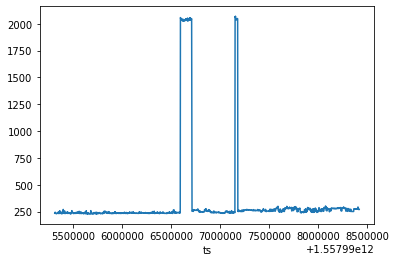

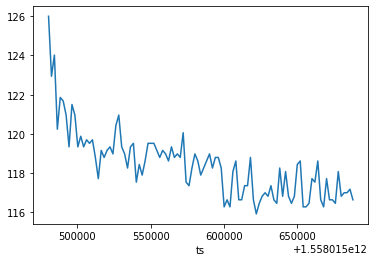

In [37]:
print(splitted_p1[0])
splitted_p1[0].plot()

plt.figure()
print(splitted_p1[5])
splitted_p1[5].plot()

## Convert timestamps to datetime

In [38]:
def convert_timestamps(dataframes):
    for df in dataframes:
        df.index = pd.to_datetime(df.index, unit='ms')
    return dataframes

In [39]:
splitted_p1 = convert_timestamps(splitted_p1)
splitted_p2 = convert_timestamps(splitted_p2)
splitted_p3 = convert_timestamps(splitted_p3)
splitted_q1 = convert_timestamps(splitted_q1)
splitted_q2 = convert_timestamps(splitted_q2)
splitted_q3 = convert_timestamps(splitted_q3)
splitted_u1 = convert_timestamps(splitted_u1)
splitted_u2 = convert_timestamps(splitted_u2)
splitted_u3 = convert_timestamps(splitted_u3)

In [40]:
splitted_p1[0]

ts
2019-05-16 08:28:37.775    234.18
2019-05-16 08:28:39.775    233.46
2019-05-16 08:28:41.780    244.62
2019-05-16 08:28:43.780    233.46
2019-05-16 08:28:45.780    233.46
                            ...  
2019-05-16 09:20:07.685    282.24
2019-05-16 09:20:09.685    269.46
2019-05-16 09:20:11.685    271.08
2019-05-16 09:20:13.690    271.80
2019-05-16 09:20:15.691    271.08
Name: P1, Length: 1549, dtype: float64

### Explore timestamps

Timestamps differ from sample to sample

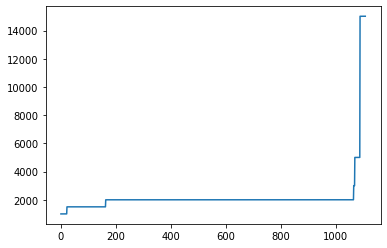

In [41]:
sorted_p1 = [calculate_diff(df).mean().astype('timedelta64[ms]').astype(int) for df in splitted_p1]
sorted_p1.sort()
plt.plot(range(len(sorted_p1)), sorted_p1)

In [42]:
sorted_p1

[998,
 998,
 999,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1498,
 1499,
 1499,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1500,
 1

In [43]:
sorted_p1[:25] # jump from ~1000 to ~1500, separation: 900 < and < 1100 - first part, > 1400 - second part
# 22 examples - I'll save them, but they won't be really useful by itself

[998,
 998,
 999,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1498,
 1499,
 1499]

In [44]:
sorted_p1[160:170] # jump from ~1500 to ~2000, separation: < 1600 - first part, > 1900 - second part

[1500, 1500, 1500, 1997, 1999, 1999, 1999, 1999, 1999, 1999]

In [45]:
sorted_p1[1060:1070] # jump from ~2000 to ~5000, separation: < 2100 - first part, > 4900 - second part

[2001, 2001, 2001, 2001, 2001, 3000, 3000, 3001, 3003, 5002]

In [46]:
sorted_p1[1068:1090] # jump from ~5000 to ~15000, separation: < 5100 - first part, > 14900 - second part
# 19 examples - I'll save them, but they won't be really useful by itself

[3003,
 5002,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 5003,
 15010,
 15010]

In [47]:
sorted_p1[1087:]
# 20 examples - I'll save them, but they won't be really useful by itself

[5003,
 15010,
 15010,
 15010,
 15010,
 15010,
 15010,
 15010,
 15011,
 15011,
 15011,
 15011,
 15011,
 15011,
 15011,
 15011,
 15011,
 15011,
 15011,
 15011,
 15012]

### Split and save data

In [48]:
def split_and_save_data(dataframes, name):
    count_1000 = 0
    count_1500 = 0
    count_2000 = 0
    count_5000 = 0
    count_15000 = 0
    
    df_1000 = []
    df_1500 = []
    df_2000 = []
    df_5000 = []
    df_15000 = []
    
    for df in dataframes:
        count = calculate_diff(df).mean().astype('timedelta64[ms]').astype(int)
        if count > 900 and count < 1100:
            df = df.resample('s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/06_Smart_Meter_45/" + name + "/1000/" + str(count_1000) + ".csv", header=True, index=True, encoding='utf-8')
            count_1000 += 1
            df_1000.append(df)
        elif count > 1400 and count < 1600:
            df = df.resample('1500ms').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/06_Smart_Meter_45/" + name + "/1500/" + str(count_1500) + ".csv", header=True, index=True, encoding='utf-8')
            count_1500 += 1
            df_1500.append(df)
        elif count > 1900 and count < 2100:
            df = df.resample('2s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/06_Smart_Meter_45/" + name + "/2000/" + str(count_2000) + ".csv", header=True, index=True, encoding='utf-8')
            count_2000 += 1
            df_2000.append(df)
        elif count > 4900 and count < 5100:
            df = df.resample('5s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/06_Smart_Meter_45/" + name + "/5000/" + str(count_5000) + ".csv", header=True, index=True, encoding='utf-8')
            count_5000 += 1
            df_5000.append(df)
        elif count > 14900 and count < 15100:
            df = df.resample('15s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/06_Smart_Meter_45/" + name + "/15000/" + str(count_15000) + ".csv", header=True, index=True, encoding='utf-8')
            count_15000 += 1
            df_15000.append(df)
            
    return [df_1000, df_1500, df_2000, df_5000, df_15000]
    

In [49]:
resulted_p1 = split_and_save_data(splitted_p1, "P1")
resulted_p2 = split_and_save_data(splitted_p2, "P2")
resulted_p3 = split_and_save_data(splitted_p3, "P3")
resulted_q1 = split_and_save_data(splitted_q1, "Q1")
resulted_q2 = split_and_save_data(splitted_q2, "Q2")
resulted_q3 = split_and_save_data(splitted_q3, "Q3")
resulted_u1 = split_and_save_data(splitted_u1, "U1")
resulted_u2 = split_and_save_data(splitted_u2, "U2")
resulted_u3 = split_and_save_data(splitted_u3, "U3")

In [50]:
p1_1000 = resulted_p1[0]
p1_1500 = resulted_p1[1]
p1_2000 = resulted_p1[2]
p1_5000 = resulted_p1[3]
p1_15000 = resulted_p1[4]

p2_1000 = resulted_p2[0]
p2_1500 = resulted_p2[1]
p2_2000 = resulted_p2[2]
p2_5000 = resulted_p2[3]
p2_15000 = resulted_p2[4]

p3_1000 = resulted_p3[0]
p3_1500 = resulted_p3[1]
p3_2000 = resulted_p3[2]
p3_5000 = resulted_p3[3]
p3_15000 = resulted_p3[4]

In [51]:
q1_1000 = resulted_q1[0]
q1_1500 = resulted_q1[1]
q1_2000 = resulted_q1[2]
q1_5000 = resulted_q1[3]
q1_15000 = resulted_q1[4]

q2_1000 = resulted_q2[0]
q2_1500 = resulted_q2[1]
q2_2000 = resulted_q2[2]
q2_5000 = resulted_q2[3]
q2_15000 = resulted_q2[4]

q3_1000 = resulted_q3[0]
q3_1500 = resulted_q3[1]
q3_2000 = resulted_q3[2]
q3_5000 = resulted_q3[3]
q3_15000 = resulted_q3[4]

In [52]:
u1_1000 = resulted_u1[0]
u1_1500 = resulted_u1[1]
u1_2000 = resulted_u1[2]
u1_5000 = resulted_u1[3]
u1_15000 = resulted_u1[4]

u2_1000 = resulted_u2[0]
u2_1500 = resulted_u2[1]
u2_2000 = resulted_u2[2]
u2_5000 = resulted_u2[3]
u2_15000 = resulted_u2[4]

u3_1000 = resulted_u3[0]
u3_1500 = resulted_u3[1]
u3_2000 = resulted_u3[2]
u3_5000 = resulted_u3[3]
u3_15000 = resulted_u3[4]

In [53]:
# just to free some space
del splitted_p1
del splitted_p2
del splitted_p3
del splitted_q1
del splitted_q2
del splitted_q3
del splitted_u1
del splitted_u2
del splitted_u3

In [54]:
del resulted_p1
del resulted_p2
del resulted_p3
del resulted_q1
del resulted_q2
del resulted_q3
del resulted_u1
del resulted_u2
del resulted_u3

# Статистические параметры

## Среднее

In [55]:
p1_1000_means = [df.mean() for df in p1_1000]
p1_1500_means = [df.mean() for df in p1_1500]
p1_2000_means = [df.mean() for df in p1_2000]
p1_5000_means = [df.mean() for df in p1_5000]
p1_15000_means = [df.mean() for df in p1_15000]

Судя по выходу следующей ячейки, среднее значение "кусков" данных отличаются

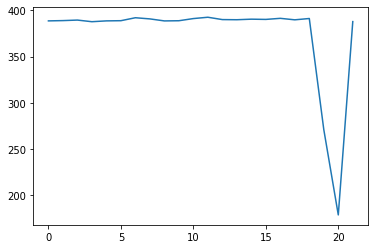

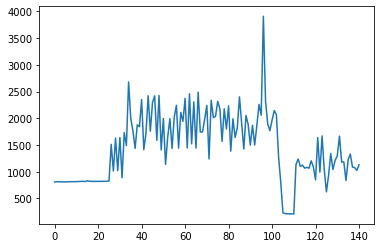

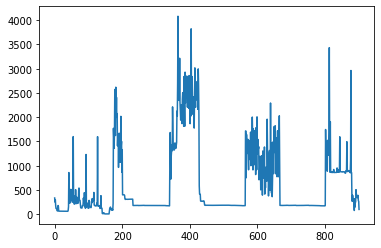

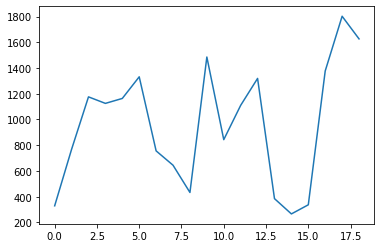

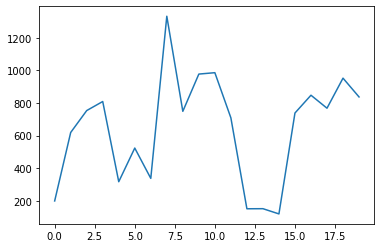

In [56]:
plt.figure()
plt.plot(range(len(p1_1000_means)),p1_1000_means)

plt.figure()
plt.plot(range(len(p1_1500_means)),p1_1500_means)

plt.figure()
plt.plot(range(len(p1_2000_means)),p1_2000_means)

plt.figure()
plt.plot(range(len(p1_5000_means)),p1_5000_means)

plt.figure()
plt.plot(range(len(p1_15000_means)),p1_15000_means)

## Медиана

In [57]:
p1_1000_medians = [df.median() for df in p1_1000]
p1_1500_medians = [df.median() for df in p1_1500]
p1_2000_medians = [df.median() for df in p1_2000]
p1_5000_medians = [df.median() for df in p1_5000]
p1_15000_medians = [df.median() for df in p1_15000]

Медианы тоже отличаются

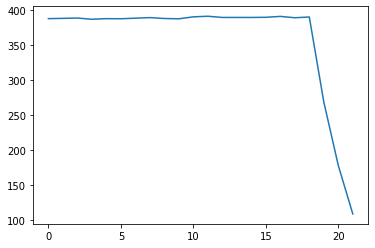

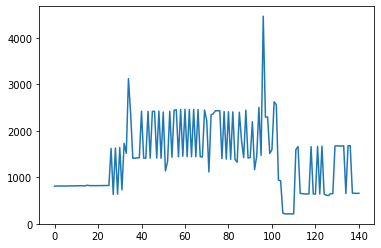

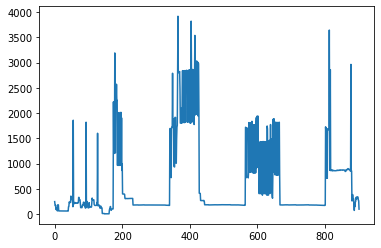

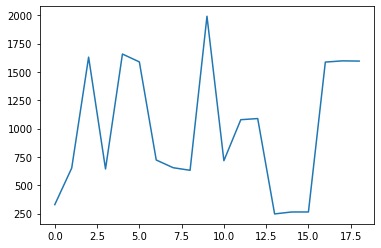

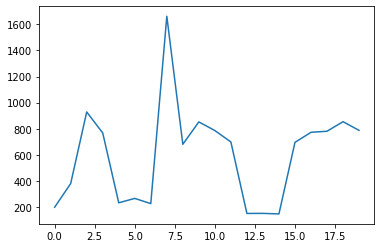

In [58]:
plt.figure()
plt.plot(range(len(p1_1000_medians)),p1_1000_medians)

plt.figure()
plt.plot(range(len(p1_1500_medians)),p1_1500_medians)

plt.figure()
plt.plot(range(len(p1_2000_medians)),p1_2000_medians)

plt.figure()
plt.plot(range(len(p1_5000_medians)),p1_5000_medians)

plt.figure()
plt.plot(range(len(p1_15000_medians)),p1_15000_medians)

## Variance

In [59]:
p1_1000_vars = [df.var() for df in p1_1000]
p1_1500_vars = [df.var() for df in p1_1500]
p1_2000_vars = [df.var() for df in p1_2000]
p1_5000_vars = [df.var() for df in p1_5000]
p1_15000_vars = [df.var() for df in p1_15000]

Также отличается и varience

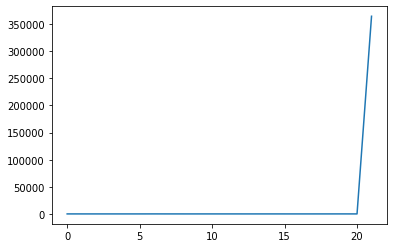

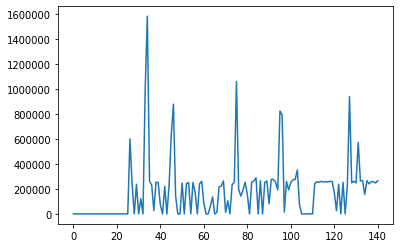

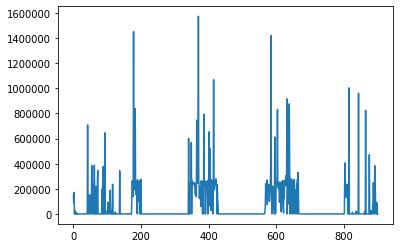

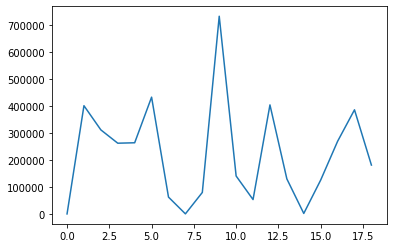

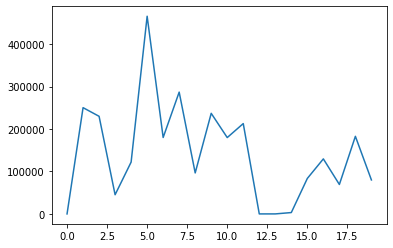

In [60]:
plt.figure()
plt.plot(range(len(p1_1000_vars)),p1_1000_vars)

plt.figure()
plt.plot(range(len(p1_1500_vars)),p1_1500_vars)

plt.figure()
plt.plot(range(len(p1_2000_vars)),p1_2000_vars)

plt.figure()
plt.plot(range(len(p1_5000_vars)),p1_5000_vars)

plt.figure()
plt.plot(range(len(p1_15000_vars)),p1_15000_vars)

## Автокорреляция

Показатели автокорреляции также отличаются для разных частей

In [61]:
p1_1000_autocorr = [df.autocorr() for df in p1_1000]
p1_1500_autocorr = [df.autocorr() for df in p1_1500]
p1_2000_autocorr = [df.autocorr() for df in p1_2000]
p1_5000_autocorr = [df.autocorr() for df in p1_5000]
p1_15000_autocorr = [df.autocorr() for df in p1_15000]

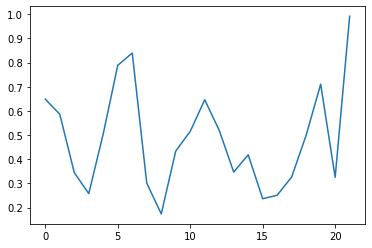

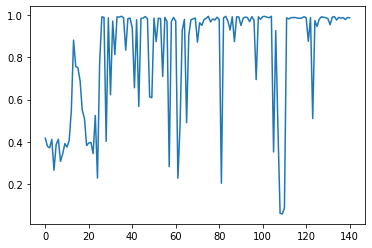

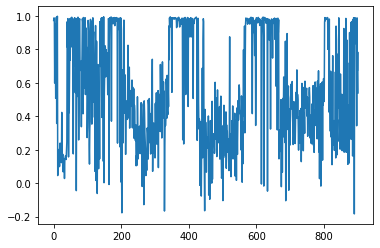

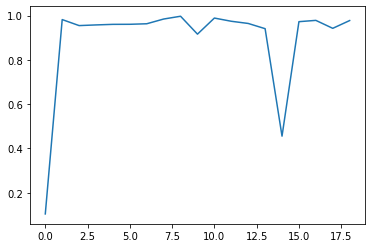

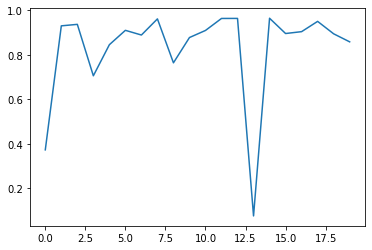

In [62]:
plt.figure()
plt.plot(range(len(p1_1000_autocorr)),p1_1000_autocorr)

plt.figure()
plt.plot(range(len(p1_1500_autocorr)),p1_1500_autocorr)

plt.figure()
plt.plot(range(len(p1_2000_autocorr)),p1_2000_autocorr)

plt.figure()
plt.plot(range(len(p1_5000_autocorr)),p1_5000_autocorr)

plt.figure()
plt.plot(range(len(p1_15000_autocorr)),p1_15000_autocorr)

## Dickey-Fuller test

In [63]:
from statsmodels.tsa.stattools import adfuller

In [64]:
p1_1000_adfuller = [adfuller(df.values) for df in p1_1000]
p1_1500_adfuller = [adfuller(df.values) for df in p1_1500]
p1_2000_adfuller = [adfuller(df.values) for df in p1_2000]
p1_5000_adfuller = [adfuller(df.values) for df in p1_5000]
p1_15000_adfuller = [adfuller(df.values) for df in p1_15000]

In [65]:
p1_1000_adfuller_p = [df[1] for df in p1_1000_adfuller]
p1_1500_adfuller_p = [df[1] for df in p1_1500_adfuller]
p1_2000_adfuller_p = [df[1] for df in p1_2000_adfuller]
p1_5000_adfuller_p = [df[1] for df in p1_5000_adfuller]
p1_15000_adfuller_p = [df[1] for df in p1_15000_adfuller]

p заметно отличается для разных отрезков => у нас много промежутков с нестационарными показателями => стандартная ARIMA не даст адекватного результата на большей части из них, так как данные нестационарны

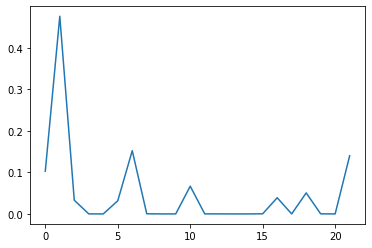

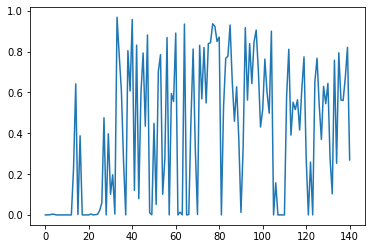

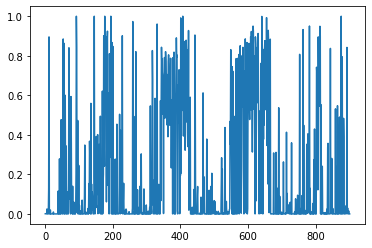

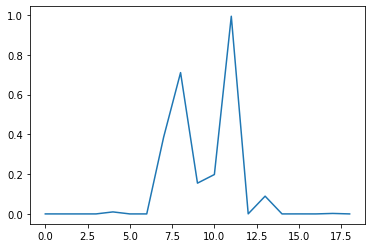

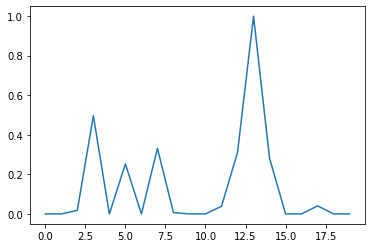

In [66]:
plt.figure()
plt.plot(range(len(p1_1000_adfuller_p)),p1_1000_adfuller_p)

plt.figure()
plt.plot(range(len(p1_1500_adfuller_p)),p1_1500_adfuller_p)

plt.figure()
plt.plot(range(len(p1_2000_adfuller_p)),p1_2000_adfuller_p)

plt.figure()
plt.plot(range(len(p1_5000_adfuller_p)),p1_5000_adfuller_p)

plt.figure()
plt.plot(range(len(p1_15000_adfuller_p)),p1_15000_adfuller_p)